<a href="https://colab.research.google.com/github/StudentsAntoniPartyka/ML/blob/main/pd7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let:

- $m = \sum_{i=1}^n y_i$ (number of positive labels)  
- $k = n - m$ (number of negative labels)

---

## 2. Derivation of the Optimal $\lambda^*$

We compute the derivative of the total loss with respect to $\lambda$ and set it to zero:

$$
\frac{d}{d\lambda} \sum_{i=1}^n L(y_i, \lambda) = 0.
$$

Since for each example,

$$
\frac{\partial}{\partial \lambda} L(y_i, \lambda)
= \frac{\partial}{\partial \lambda} \bigl[-y_i\log\sigma(\lambda) - (1-y_i)\log(1-\sigma(\lambda))\bigr]
= \sigma(\lambda) - y_i,
$$

we get:

$$
0 = \sum_{i=1}^n \bigl[\sigma(\lambda) - y_i\bigr]
= n \cdot \sigma(\lambda) - \sum_{i=1}^n y_i
= n \cdot \sigma(\lambda) - m.
$$

Solving for $\sigma(\lambda)$:

$$
\sigma(\lambda^*) = \frac{m}{n}.
$$

Recalling that $\sigma(\lambda) = \frac{1}{1 + e^{-\lambda}}$, we invert the sigmoid:

$$
\lambda^* = \log\frac{\sigma(\lambda^*)}{1 - \sigma(\lambda^*)}
= \log\frac{m/n}{1 - m/n}
= \log\frac{m}{k}.
$$

**Answer:**

$$
\boxed{\lambda^* = \log\frac{m}{k}}
$$

## 3. Interpretation of $\lambda^*$

- The optimal constant logit $\lambda^*$ equals the log‑odds of the fraction of positive labels in the dataset.  
- In probability space, the fitted constant probability is $\hat{p} = m/n$, the dataset prevalence.  
- In logit space, $\lambda^*$ centers the model so that the predicted probability matches the empirical positive rate.


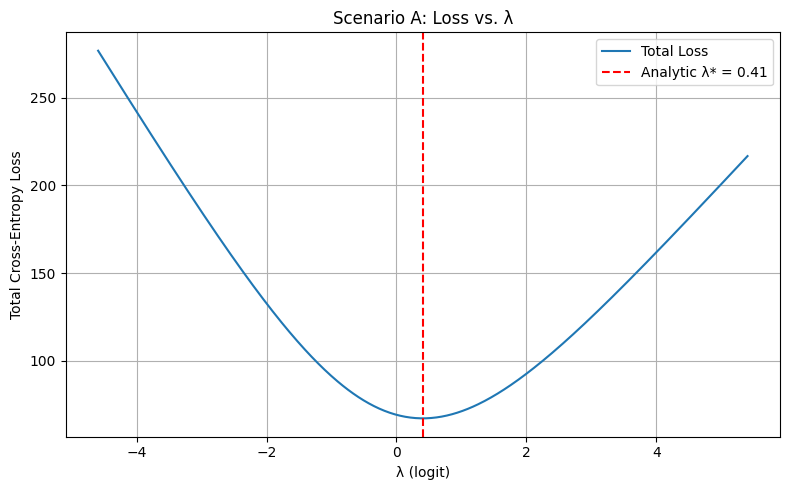

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit as sigmoid

# Example counts
m = 60   # number of positive labels
k = 40   # number of negative labels
n = m + k

# Analytic optimal lambda (log-odds)
lambda_star = np.log(m / k)
y = np.concatenate([np.ones(m), np.zeros(k)])

# Define total loss function for Scenario A
def total_loss(lmbda):
    pos = -m * np.log(sigmoid(lmbda))         # loss for positive labels (y=1)
    neg = -k * np.log(1 - sigmoid(lmbda))     # loss for negative labels (y=0)
    return pos + neg

def total_loss_A(lmbda):
    return -m * np.log(sigmoid(lmbda)) - k * np.log(1 - sigmoid(lmbda))

lams = np.linspace(np.log(m/k)-5, np.log(m/k)+5, 500)
loss_A = [total_loss_A(l) for l in lams]
# Generate grid of lambda values
lambdas = np.linspace(lambda_star - 5, lambda_star + 5, 500)
loss_vals = [total_loss(l) for l in lambdas]

# Plot the loss landscape
plt.figure(figsize=(8, 5))
plt.plot(lambdas, loss_vals, label='Total Loss')
plt.axvline(lambda_star, linestyle='--', color='red', label=f"Analytic λ* = {lambda_star:.2f}")
plt.xlabel('λ (logit)')
plt.ylabel('Total Cross-Entropy Loss')
plt.title('Scenario A: Loss vs. λ')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



---

## Scenario B: Additive Shift on Existing Predictor

### Implicit Equation
We now solve:

$$
\lambda^* = \arg\min_\lambda \sum_{i=1}^n L\bigl(y_i, f_i + \lambda\bigr).
$$

Derivative set to zero implies:

$$
\sum_{i=1}^n \bigl[\sigma(f_i+\lambda)-y_i\bigr] = 0
\quad\Longrightarrow\quad
\sum_{i=1}^n \sigma(f_i+\lambda) = m.
$$

No closed‑form solution exists because each term \(\sigma(f_i+\lambda)\) is shifted differently by \(f_i\).


### Discussion
- **Scenario A**: Single logistic term ⇒ strong convexity, unique minimum, closed‑form.  
- **Scenario B**: Sum of *shifted* sigmoid losses ⇒ curvature varies, plateaus when \(f_i+\lambda\) saturate, no analytic collapse.  
- **Numeric Root-Finding**: While the total is convex, poor conditioning (flat regions vs. sharp slopes) slows convergence of gradient-based methods.

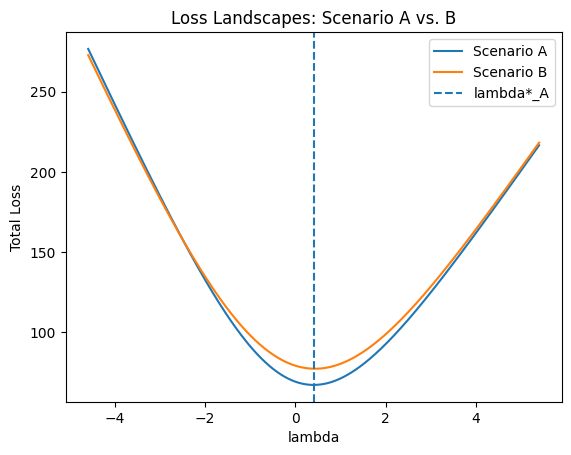

In [ ]:
g = np.random.RandomState(0)
f = g.randn(n)

# Define losses
loss_A = [total_loss_A(l) for l in lams]
loss_B = []
for l in lams:
    z = f + l
    loss_B.append(-np.sum(y*np.log(sigmoid(z)) + (1-y)*np.log(1-sigmoid(z))))

# Plot
plt.figure()
plt.plot(lams, loss_A, label='Scenario A')
plt.plot(lams, loss_B, label='Scenario B')
plt.axvline(np.log(m/k), linestyle='--', label='lambda*_A')
plt.xlabel('lambda')
plt.ylabel('Total Loss')
plt.title('Loss Landscapes: Scenario A vs. B')
plt.legend()
plt.show()